# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import camb
from camb import model, initialpower
print(f'Using CAMB {camb.__version__} installed at {os.path.dirname(camb.__file__)}')

Using CAMB 1.5.8 installed at /home/gilee/CAMB/camb


# Working directory

In [2]:
# os.getcwd() # current working directory

In [3]:
os.chdir("/md/gilee/Multiverse/ic_gen/music_ic/") # changing working direcory

In [4]:
!tree

.
├── check-power-sepctrum.ipynb
├── FFT.ipynb
├── MUSIC_new
│   ├── box_lmin07_knum3000
│   │   ├── camb_transfer_z200_w0-1.0_wa+0.0.txt
│   │   ├── dump_transfer.txt
│   │   ├── ics_example.conf
│   │   ├── ics_example.conf_log.txt
│   │   ├── ics_ramses
│   │   │   ├── level_007
│   │   │   │   ├── ic_deltab
│   │   │   │   ├── ic_poscx
│   │   │   │   ├── ic_poscy
│   │   │   │   ├── ic_poscz
│   │   │   │   ├── ic_velbx
│   │   │   │   ├── ic_velby
│   │   │   │   ├── ic_velbz
│   │   │   │   ├── ic_velcx
│   │   │   │   ├── ic_velcy
│   │   │   │   └── ic_velcz
│   │   │   └── ramses.nml
│   │   ├── input_powerspec.txt
│   │   ├── log.txt
│   │   ├── MUSIC_knum3000
│   │   └── wnoise_0007.bin
│   ├── box_lmin07_krange01
│   │   ├── camb_transfer_z200_w0-1.0_wa+0.0.txt
│   │   ├── dump_transfer.txt
│   │   ├── ics_example.conf
│   │   ├── ics_example.conf_log.txt
│   │   ├── ics_ramses
│   │   │   ├── level_007
│   │   │   │   ├── ic_deltab
│   │   │   │   ├── ic_poscx
│   │   │  

In [5]:
fpath = os.path.join( os.getcwd(), 'MUSIC_old/test_Lbox/box_lmin07')
os.chdir(fpath) # changing working direcory

In [6]:
os.getcwd()

'/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_Lbox/box_lmin07'

# MUSIC output (`input_powerspec.txt`)

In [7]:
music_output = np.loadtxt("./input_powerspec.txt", unpack=True)
music_kh  = music_output[0,:] # [1/Mpc]
music_Pc  = music_output[1,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pvc = music_output[2,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pb  = music_output[3,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pvb = music_output[4,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pt  = music_output[5,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pvt = music_output[6,:] * 8*np.pi**3 # [h^{-3} Mpc^3]

`vi "./input_powerspec.txt"`

```
# The power spectrum definition is smaller than CAMB by a factor 8 pi^3.
#      k [h/Mpc]           P_cdm          P_vcdm           P_bar          P_vbar         P_total        P_vtotal
     1.07419e-05     9.06753e-06     9.01194e-06     9.06753e-06     9.01194e-06     9.11165e-06     9.01194e-06
     1.12853e-05     9.50743e-06     9.44913e-06     9.50743e-06     9.44913e-06     9.55368e-06     9.44913e-06
     1.18561e-05     9.96867e-06     9.90754e-06     9.96867e-06     9.90754e-06     1.00172e-05     9.90754e-06
     1.24559e-05     1.04523e-05     1.03882e-05     1.04523e-05     1.03882e-05     1.05031e-05     1.03882e-05
```

In `input_powerspec.txt`, the first column is clarified as `k [h/Mpc]`, which is same with `k/h [1/Mpc]` in CAMB.  
Becuase the expression of wave number can be written as follows:
1. $k = \frac{2\pi}{\lambda}$ $[1/Mpc]$ : **CAMB**
2. $\frac{k}{h} = \frac{2\pi}{\lambda h}$ $[1/Mpc]$ : **CAMB**
3. $k = \frac{2\pi}{\lambda h}$ $[h/Mpc]$ : **MUSIC**

where $\lambda$ has a unit of $Mpc$.

Therefore, `k/h [1/Mpc]` in CAMB has the same value with `k [h/Mpc]` in MUSIC.

In [8]:
music_output.shape

(7, 300)

# CAMB output (`camb_transfer_z200_w0-1.0_wa+1.0.txt`)

In [9]:
cambfile = [file for file in os.listdir("./") if 'camb' in file]
cambfile

['camb_transfer_z200_w0-1.0_wa+0.0.txt']

In [10]:
camb_output = np.loadtxt(cambfile[0], unpack=True)
camb_kh = camb_output[0,:] # [1/Mpc]
camb_Tc = camb_output[1,:] # [dimensionless]
camb_Tb = camb_output[2,:] # [dimensionless]
camb_Tt = camb_output[6,:] # [dimensionless]
# camb_Tt = camb_output[7,:] # [dimensionless] # 'no_nu' is dummy
camb_Tvc = camb_output[10,:] # [dimensionless]
camb_Tvb = camb_output[11,:] # [dimensionless]

In [11]:
camb_output.shape

(13, 217)

- Transfer_kh = 1 (k/h)
- Transfer_cdm = 2 (cdm)
- Transfer_b = 3 (baryons)
- Transfer_g = 4 (photons)
- Transfer_r = 5 (massless neutrinos)
- Transfer_nu = 6 (massive neutrinos)
- Transfer_tot = 7 (total matter)
- Transfer_nonu = 8 (total matter excluding neutrinos)
- Transfer_tot_de = 9 (total including dark energy perturbations)
- Transfer_Weyl = 10 (Weyl potential)
- Transfer_Newt_vel_cdm = 11 (Newtonian CDM velocity)
- Transfer_Newt_vel_baryon = 12 (Newtonian baryon velocity)
- Transfer_vel_baryon_cdm = 13 (relative baryon-cdm velocity)

In [12]:
# power spectrum noramlization factor at k=k0
As = 2.1646544338903368e-09 # for levelmin = 7

bias8_z0_WMAP5  = 1.26             # target value
sigma8_z0_WMAP5 = 1/bias8_z0_WMAP5 # target value # sigma8 at z=0

ns        = 0.96                   # power spectral index
h         = 0.72                   # little h, dimensionless hubble parameter, H0 = 100*h [km/s/Mpc]

Omega_m   = 0.26                   # physical total matter density
Omega_b   = 0.044                  # physical baryon density
Omega_c   = Omega_m - Omega_b      # physical CDM (cold dark mattery) density
Omega_l   = 1 - Omega_m            # DE (dark energy) density
Omega_k   = 0.0                    # spatial curvature, omk = 1 - omt

# EoS of DE
w0 = -1
wa = 0

z = [200]
z = np.array(z)
a = 1/(1+z)

# starting redshift
z_start = 200
a_start = 1/(z_start+1)

# simulation box setups
levelmin = 7
levelmax = levelmin + 7
n_cell0  = 2**levelmin
c_Lbox   = 2**levelmax / 1000 # [cMpc]
c_dx0    = c_Lbox / n_cell0   # [cMpc]


# power spectrum params
kmin = 2 * np.pi / c_Lbox       # [1/Mpc] # largest scale (box size)
kmax = np.pi * n_cell0 / c_Lbox # [1/Mpc] # smallest scale (Nyquist wavenumber)
khmin = kmin/h                  # [1/Mpc] # largest scale (box size)
khmax = kmax/h                  # [1/Mpc] # smallest scale (Nyquist wavenumber)
k0  = 0.05                      # [1/Mpc] pivot_scalar
kh0 = k0/h                      # [1/Mpc] pivot_scalar

**Above parameters should have the same values with those for generating the CAMB tranfer function table.**

In [13]:
def compute_camb_Pk(kh, T):
    """
    Ref: Cell [52] in https://camb.readthedocs.io/en/latest/CAMBdemo.html
    """  
    k = kh*h # [1/Mpc]
    primordial_PK = As * (k/k0)**(ns-1)
    Pk = primordial_PK * T*T * k * 2*np.pi*np.pi *h*h*h # [h^{-3} Mpc^3]
    return Pk

In [14]:
camb_Pt  = compute_camb_Pk(camb_kh, camb_Tt)  # [h^{-3} Mpc^3]
camb_Pc  = compute_camb_Pk(camb_kh, camb_Tc)  # [h^{-3} Mpc^3]
camb_Pb  = compute_camb_Pk(camb_kh, camb_Tb)  # [h^{-3} Mpc^3]
camb_Pvc = compute_camb_Pk(camb_kh, camb_Tvc) # [h^{-3} Mpc^3]
camb_Pvb = compute_camb_Pk(camb_kh, camb_Tvb) # [h^{-3} Mpc^3]

# Compare the power spectra from MUSIC and CAMB

<IPython.core.display.Javascript object>


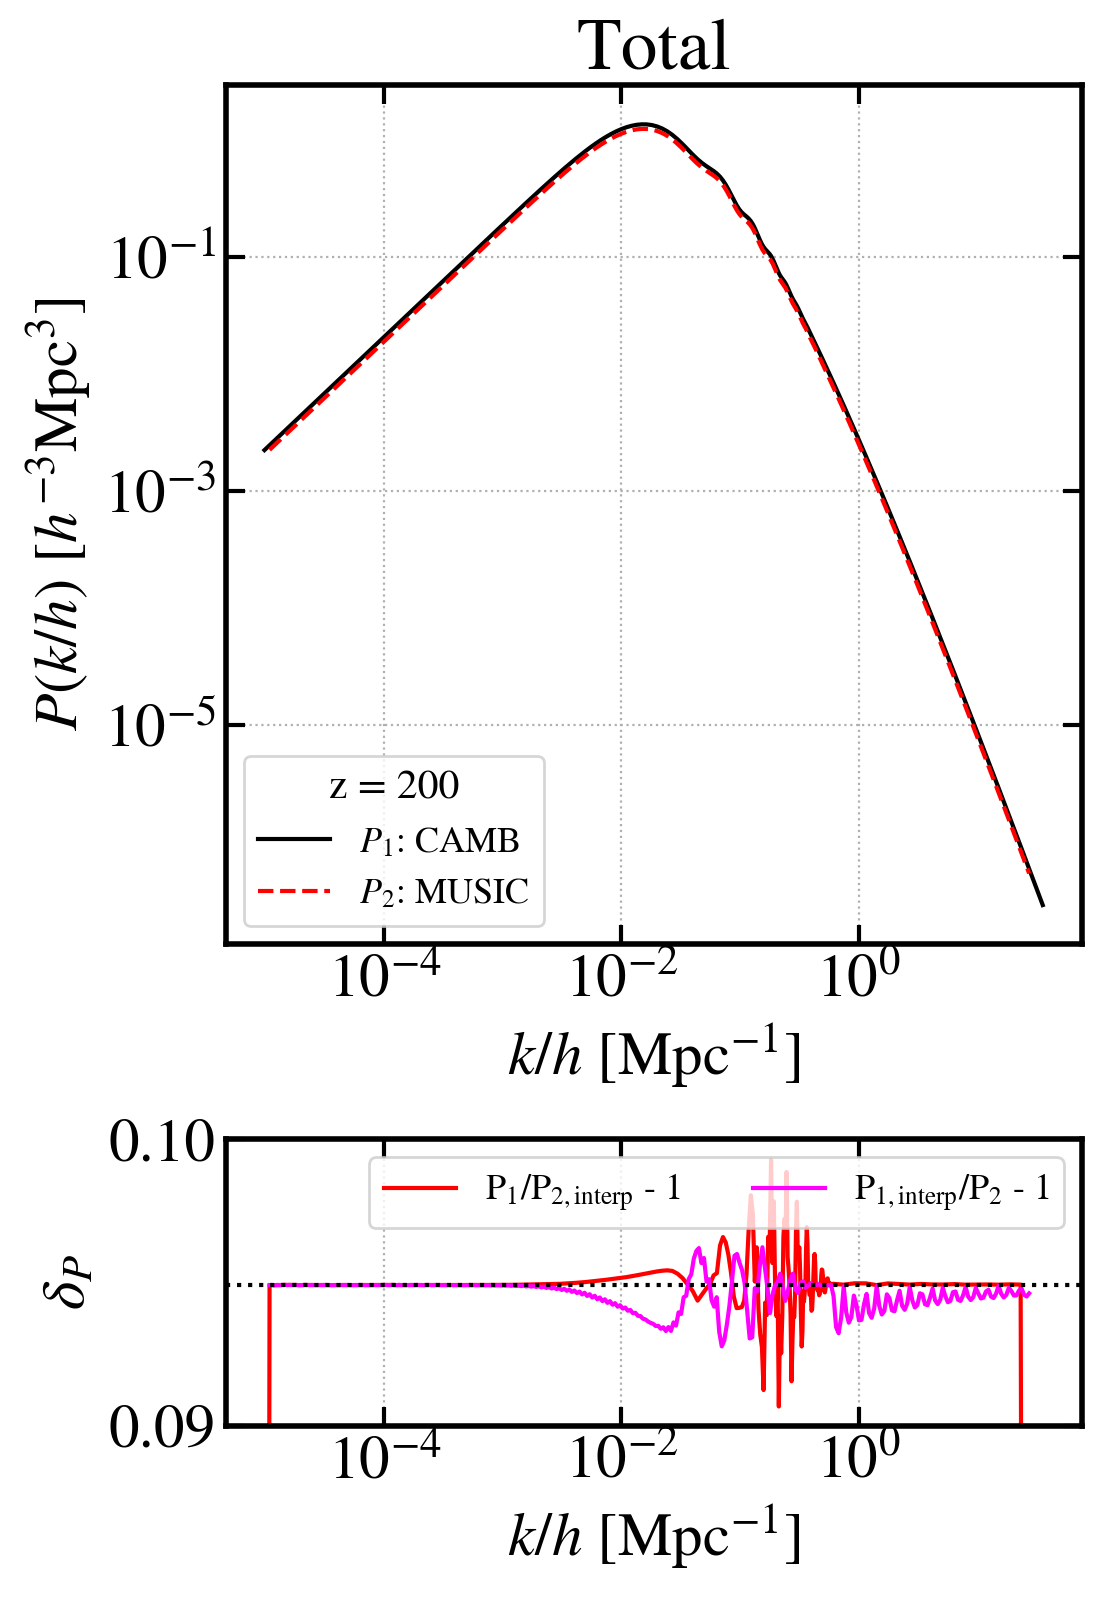

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), gridspec_kw={'height_ratios': [3, 1]})

x1 = camb_kh
P1 = camb_Pt

x2 = music_kh
P2 = music_Pt

iP1 = pow(10, np.interp(np.log10(x2), np.log10(x1), np.log10(P1))) # interpolation
iP2 = pow(10, np.interp(np.log10(x1), np.log10(x2), np.log10(P2))) # interpolation

ax[0].loglog(x1, P1, c='k', label=r"$P_{1}$: CAMB")
ax[0].loglog(x2, P2, c='r', ls="--", label=r'$P_{2}$: MUSIC')
ax[0].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
ax[0].set_ylabel(r"$P(k/h)$ [$h^{-3}$Mpc$^{3}$]") # checking the unit
ax[0].legend(title=f"z = {z[0]}", fontsize=13, title_fontsize=15)
ax[0].grid(ls=":")

ax[1].semilogx(x1, P1/iP2 - 1, c='r',       label=r"$\rm P_{1}/P_{2,interp}$ - 1")
ax[1].semilogx(x2, iP1/P2 - 1, c='magenta', label=r"$\rm P_{1,interp}/P_{2}$ - 1")
ax[1].axhline((iP1/P2)[0] - 1, ls=":", c="k")
ax[1].set_ylim(0.09 , 0.1)

ax[1].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
ax[1].set_ylabel(r"$\delta_P$")
ax[1].grid(ls=":")
ax[1].legend(ncols=2, fontsize=13, title_fontsize=15)

ax[0].set_title("Total")
plt.tight_layout(pad=0.3)

In [17]:
print("\Delta_P = ", (iP1/P2)[0]-1)

\Delta_P =  0.09490936985226561


If MUSIC calculate the power spectrum correctly, the results should be same with CAMB.  
In other word, $P_{CAMB} / P_{MUSIC} = 1$.  
**However, there is ~9.5% difference. Why?**

# Power Spectra in MUSIC output (`input_powerspec.txt`)

I am looking into the MUSIC source code, and found the part where `input_powerspec.txt` is written.   

vi `$MUSIC/src/transfer_function.hh`

```c++
//! k-space transfer function
class TransferFunction_k
{
public:
    static transfer_function *ptf_;
    static real_t nspec_;
    double pnorm_, sqrtpnorm_;
    static tf_type type_;

    TransferFunction_k( tf_type type, transfer_function *tf, real_t nspec, real_t pnorm )
    : pnorm_(pnorm)
    {
        ptf_ = tf;
        nspec_ = nspec;
        sqrtpnorm_ = sqrt( pnorm_ );
        type_ = type;

        std::string fname("input_powerspec.txt");
        if( type == cdm || type == total )
          {
            std::ofstream ofs(fname.c_str());
            double kmin=log10(tf->get_kmin()), kmax= log10(tf->get_kmax());
            double dk=(kmax-kmin)/300.;

            ofs << "# The power spectrum definition is smaller than CAMB by a factor 8 pi^3."
                << std::endl;

            if( tf->tf_is_distinct() )
              {
                ofs << "#"
                    << std::setw(15) << "k [h/Mpc]"
                    << std::setw(16) << "P_cdm"
                    << std::setw(16) << "P_vcdm"
                    << std::setw(16) << "P_bar"
                    << std::setw(16) << "P_vbar"
                    << std::setw(16) << "P_total"
                    << std::setw(16) << "P_vtotal"
                    << std::endl;

                for( int i=0; i<300; ++i )
                {
                    double k = pow(10.0,kmin+i*dk);
                    ofs << std::setw(16) << k
                        << std::setw(16) << pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,cdm),2)
                        << std::setw(16) << pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,vcdm),2)
                        << std::setw(16) << pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,baryon),2)
                        << std::setw(16) << pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,vbaryon),2)
                        << std::setw(16) << pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,total),2)
                        << std::setw(16) << pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,vtotal),2)
                        << std::endl;
                }
              }
            else
            ...
```

# Normalization factor in MUSIC (`pnorm`)

The normalization factor `pnorm` is defined and initialized as 0.0 in `general.hh` first. Then, it is clarified in `main.cc` with the `ComputePNorm` function.

``` c++
cosmo.pnorm     = ccalc.ComputePNorm( 2.0*M_PI/boxlength );
```


`ComputePNorm` can be found in `cosmology.hh` as follow.

```c++

//! Computes the normalization for the power spectrum
/*!
 * integrates the power spectrum to fix the normalization to that given
 * by the sigma_8 parameter
 */
real_t ComputePNorm( real_t kmax )
{
        real_t sigma0, kmin;
        kmax = m_pTransferFunction->get_kmax();//m_Cosmology.H0/8.0;
        kmin = m_pTransferFunction->get_kmin();//0.0;

if( !m_pTransferFunction->tf_has_total0() )
    sigma0 = 4.0 * M_PI * integrate( &dSigma8, (double)kmin, (double)kmax, (void*)m_pTransferFunction );
else
    sigma0 = 4.0 * M_PI * integrate( &dSigma8_0, (double)kmin, (double)kmax, (void*)m_pTransferFunction );

return m_Cosmology.sigma8*m_Cosmology.sigma8/sigma0;
}

```

On the other hand, the `get_kmax()` and `get_kmin()` functions, defined in `$MUSIC/src/plugins/transfer_camb.cc`, return **the second k-values from the beginning and the end of the k-values table.**

```c++
inline double get_kmin(void)
{
      return pow(10.0, m_tab_k[1]);  
}

inline double get_kmax(void)
{
      return pow(10.0, m_tab_k[m_tab_k.size() - 2]);
}
```

**In stead of using the second k-values, I can try taking the first k-values.**  
**I will show the result in the end of this notebook.**  
**In conclusion, it does not reduce the difference..**

**Other things I have to check are**

1. **[DONE]** the meaning of `dSigma8`,
2. **[DONE]** the process of `integrate`, and &rarr; `Numerics.cc`
3. **[DONE]** understanding how does CAMB compute sigma8.  

# Check `dSigma8`

`pnorm` = m_Cosmology.sigma8*m_Cosmology.sigma8/sigma0;  

Becuase, in the function `ComputePNrom`:  
```cpp
if( !m_pTransferFunction->tf_has_total0() )
    sigma0 = 4.0 * M_PI * integrate( &dSigma8, (double)kmin, (double)kmax, (void*)m_pTransferFunction );

return m_Cosmology.sigma8*m_Cosmology.sigma8/sigma0;
```

Here, `sigma0` actually should be the square of sigma value.  
`m_Cosmology.sigma8` is the target sigma from configuration file, which we want to use for normalization.  
`sigma8` is actual sigma value calculated from transfer function.  
**Should it be same with m_Cosmology.sigma8?**

```c++
//! Integrand for the sigma_8 normalization of the power spectrum
    /*! Returns the value of the primordial power spectrum multiplied with 
     the transfer function and the window function of 8 Mpc/h at wave number k */
    static double dSigma8( double k, void *Params )
    {
        if( k<=0.0 )
            return 0.0f;

        transfer_function *ptf = (transfer_function *)Params;

        double x = k*8.0;
        double w = 3.0*(sin(x)-x*cos(x))/(x*x*x);
        static double nspect = (double)ptf->cosmo_.nspect;

        double tf = ptf->compute(k, total);

        //... no growth factor since we compute at z=0 and normalize so that D+(z=0)=1
        return k*k * w*w * pow((double)k,(double)nspect) * tf*tf;

    }
```

# `integrate` function in `Numerics.cc`

```cpp
#ifdef WITH_MPI
  #ifdef MANNO
    #include <mpi.h>
  #else
    #include <mpi++.h>
  #endif
#endif
#include <iostream>
#include "Numerics.hh"

#ifndef REL_PRECISION
#define REL_PRECISION 1.e-5
#endif

real_t integrate( double (* func) (double x, void * params), double a, double b, void *params )
{
        gsl_function F;
        F.function = func;
        F.params = params;

        double result;
        double error;


        gsl_set_error_handler_off ();
        gsl_integration_workspace *w = gsl_integration_workspace_alloc(100000);
        gsl_integration_qag( &F, a, b, 0, REL_PRECISION, 100000, 6, w, &result, &error );


        gsl_integration_workspace_free(w);

        gsl_set_error_handler(NULL);

        if( error/result > REL_PRECISION )
                std::cerr << " - Warning: no convergence in function 'integrate', rel. error=" << error/result << std::endl;

        return (real_t)result;
}

```


# See the log file to check the `pnorm` value

In [18]:
os.getcwd()

'/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_Lbox/box_lmin07'

In [19]:
!tail -n 55 ./ics_example.conf_log.txt

16:19:02 | info    | List of all configuration options:
16:19:02 | info    |               cosmology/H0 = 72
16:19:02 | info    |          cosmology/Omega_L = 0.74
16:19:02 | info    |          cosmology/Omega_b = 0.044
16:19:02 | info    |          cosmology/Omega_m = 0.26
16:19:02 | info    |            cosmology/dplus = 0.00660487541459
16:19:02 | info    |            cosmology/nspec = 0.96
16:19:02 | info    |            cosmology/pnorm = 3.80011013498e-11
16:19:02 | info    |          cosmology/sigma_8 = 0.7936507936507936
16:19:02 | info    |         cosmology/transfer = camb_file
16:19:02 | info    |    cosmology/transfer_file = camb_transfer_z200_w0-1.0_wa+0.0.txt
16:19:02 | info    |            cosmology/vfact = 722.910771423
16:19:02 | info    |               cosmology/w0 = -1.0
16:19:02 | info    |               cosmology/wa = 0.0
16:19:02 | info    |            output/filename = ics_ramses
16:19:02 | info    |              output/format = grafic2
16:19:02 | info    |       

In [20]:
# MUSIC parameters
nspec = 0.96
pnorm = 3.80011013498e-11    # from the above log file
sigma_8 = 0.7936507936507936 # same as sigma_8(CAMB)

In [21]:
def compute_music_Pk(k, Tcamb, pnorm, nspec):
    """
    See the $MUSIC/src/transfer_function.hh
    Line 167: 
      pow(sqrtpnorm_*pow(k,0.5*nspec_)*ptf_->compute(k,cdm),2)
    """
    return pnorm * k**nspec* Tcamb**2 * 8*np.pi**3 # [h^{-3} Mpc^3]

In [22]:
mymusic_Pt = compute_music_Pk(camb_kh, camb_Tt, pnorm, nspec)
mymusic_Pc = compute_music_Pk(camb_kh, camb_Tc, pnorm, nspec)
mymusic_Pb = compute_music_Pk(camb_kh, camb_Tb, pnorm, nspec)
mymusic_Pvc = compute_music_Pk(camb_kh, camb_Tvc, pnorm, nspec)
mymusic_Pvb = compute_music_Pk(camb_kh, camb_Tvb, pnorm, nspec)

# Compare the power spectra from MUSIC and CAMB
# But again with my own MUSIC result (P3: new one)

<IPython.core.display.Javascript object>


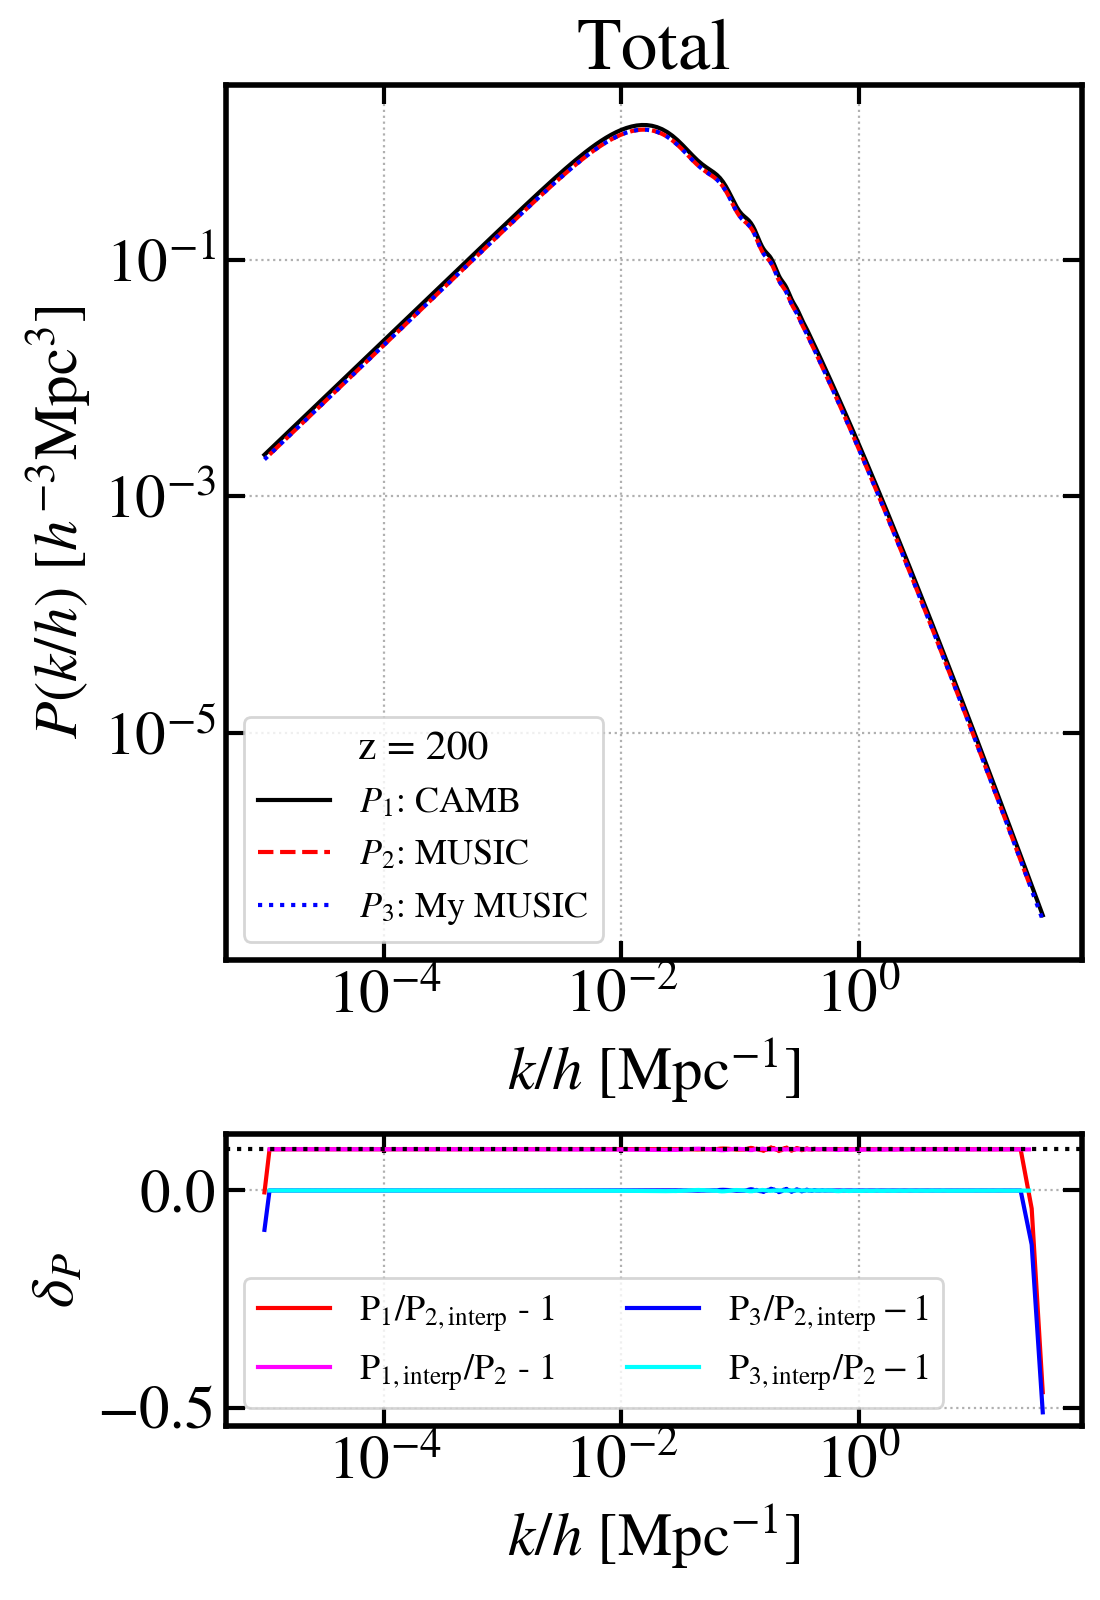

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), gridspec_kw={'height_ratios': [3, 1]})

x1 = camb_kh
P1 = camb_Pt

x2 = music_kh
P2 = music_Pt 

x3 = camb_kh
P3 = mymusic_Pt

iP1 = pow(10, np.interp(np.log10(x2), np.log10(x1), np.log10(P1))) # interpolation
iP2 = pow(10, np.interp(np.log10(x1), np.log10(x2), np.log10(P2))) # interpolation
iP3 = pow(10, np.interp(np.log10(x2), np.log10(x3), np.log10(P3))) # interpolation

ax[0].loglog(x1, P1, c='k', label=r"$P_{1}$: CAMB")
ax[0].loglog(x2, P2, c='r', ls="--", label=r'$P_{2}$: MUSIC')
ax[0].loglog(x3, P3, c='b', ls=":", label=r'$P_{3}$: My MUSIC')

ax[0].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
ax[0].set_ylabel(r"$P(k/h)$ [$h^{-3}$Mpc$^{3}$]") # checking the unit
ax[0].legend(title=f"z = {z[0]}", fontsize=13, title_fontsize=15)
ax[0].grid(ls=":")

ax[1].semilogx(x1, P1/iP2 - 1, c='r',       label=r"$\rm P_{1}/P_{2,interp}$ - 1")
ax[1].semilogx(x2, iP1/P2 - 1, c='magenta', label=r"$\rm P_{1,interp}/P_{2}$ - 1")
ax[1].axhline((iP1/P2)[0] - 1, ls=":", c="k")
# ax[1].set_ylim(0.09, 0.1)

ax[1].semilogx(x1, P3/iP2 - 1, c='b',    label=r"$\rm P_{3}/P_{2,interp} - 1$")
ax[1].semilogx(x2, iP3/P2 - 1, c='cyan', label=r"$\rm P_{3,interp}/P_{2} - 1$")
# ax[1].set_ylim(-0.00001, 0.00001)

ax[1].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
ax[1].set_ylabel(r"$\delta_P$")
ax[1].grid(ls=":")
ax[1].legend(ncols=2, fontsize=13, title_fontsize=15)

ax[0].set_title("Total")
plt.tight_layout(pad=0.3)

In [25]:
(iP1/P2)[0], (iP3/P2)[0]

(1.0949093698522656, 1.00000036503597)

I obtain my own power spectrum from the `CAMB` transfer function.  
I named it as `My MUSIC`, and `My MUSIC` result is same with the original `MUSIC` result.  
`P2 (MUSIC)` and `P3 (My MUSIC)` show just ~0.00003% difference, which is negligible.  
Therefore, now I have a proper function (`compute_music_PK`) to calculate the MUSIC output (`input_powerspec.txt`) from `CAMB` transfer table.

When I use `force_pnorm`, the correction factor is defined as below.  
I will explain the details in the next section.

In [26]:
correction_factor = (iP1/P2)[0]
correction_factor

1.0949093698522656

# Definitions of Power spectra in MUSIC and CAMB

In `input_powerspec.txt`, the power spectrum is defined by  
$P_{MUSIC} = 8 \pi^3 \times pnorm \times k^{n_{spec}} \times T_{CAMB}(k)^2 [h^{-3} Mpc^3]$.

While, CAMB compute power sectrum as  
$P_{CAMB} = A_s \times (k/k_0)^{n_{spec} - 1} \times \frac{2 \pi^2}{k^3} \times k^4 \times T_{CAMB}(k)^2 \times h^3 [h^{-3}Mpc^3]$,  
or equivalently,  
$P_{CAMB} = 2 \pi^2  \times A_s \times k_0^{1-n_{spec}} \times k^{n_{spec}} \times T_{CAMB}(k)^2 \times h^3 [h^{-3}Mpc^3]$.

**Note that the expressions (units) of $k$ in MUSIC and CAMB are different in the above two power spectra!**

* **MUSIC: $k$ [$h$/Mpc]**
* **CAMB : $k$ [1/Mpc]**

**Do never confuse them!**  
Considering the unit difference, we can rewrite $P_{MUSIC}$ using CAMB's expression. Then,  

$P_{MUSIC} = 8 \pi^3 \times pnorm \times (k/h)^{n_{spec}} \times T_{CAMB}(k/h)^2 [h^{-3} Mpc^3]$.

Let $\delta_{P} = \frac{P_{CAMB} - P_{MUSIC}}{P_{MUSIC}} = \frac{P_{CAMB}}{P_{MUSIC}} - 1$.  
So far, we found that  
$\frac{P_{CAMB}}{P_{MUSIC}} = \delta_{P} + 1 \approx 1.0945370$  
$\frac{2 \pi^2  \times A_s \times k_0^{1-n_{spec}} \times k^{n_{spec}} \times T_{CAMB}(k)^2 \times h^3}
      {8 \pi^3 \times pnorm \times k^{n_{spec}} \times h^{-n_{spec}} \times T_{CAMB}(k)^2} = \delta_{P} + 1$  

From this,  
$pnorm = \frac{2 \pi^2  \times A_s \times k_0^{1-n_{spec}} \times h^3}
              {8 \pi^3 \times (\delta_{P}+1) \times h^{-n_{spec}}}$

$pnorm = \frac{A_s \times k_0^{1-n_{spec}} \times h^{3+n_{spec}}}{4 \pi \times (\delta_{P}+1)}$


However, we want that
$P_{CAMB} = P_{MUSIC}$ (i.e., $\delta_{P} = 0$). Let $pnorm_{new}$ be a new normalization factor which satisfies with $\frac{P_{CAMB}}{P_{MUSIC}} = 1$.  

$pnorm_{new} = \frac{A_s \times k_0^{1-n_{spec}} \times h^{3+n_{spec}}}{4 \pi} = pnorm \times (\delta_P + 1) \approx pnorm \times 1.0945370$

In [27]:
print(k0) # CAMB
print(As) # CAMB
print(ns) # CAMB
print(nspec) # MUSIC

0.05
2.1646544338903368e-09
0.96
0.96


In [28]:
def compute_pnorm(ratio_Pcamb_Pmusic):
    pnorm = As * pow(k0, 1-ns) * pow(h, 3+ns)
    pnorm/= 4 * np.pi * (ratio_Pcamb_Pmusic)
    return pnorm

In [29]:
mypnorm = compute_pnorm(correction_factor)

In [30]:
mypnorm, pnorm, pnorm / mypnorm

(3.8001087478036166e-11, 3.80011013498e-11, 1.0000003650359701)

`mypnorm` and `pnorm` are almost same.

In [31]:
pnorm_new = compute_pnorm(1)
pnorm_new

4.16077467442774e-11

**I will set `force_pnorm` in `ics_example.conf` as `pnorm_new`!**  
The results are here: `/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_pnorm/box_lmin07_new_pnorm/`.

# [Trial-00] Setting `force_pnorm`

In [32]:
def compare_camb_music(fpath):
    
    # load MUSIC power spectra
    music_output = np.loadtxt(os.path.join(fpath, "input_powerspec.txt"), unpack=True)
    music_kh  = music_output[0,:] # [1/Mpc]
    music_Pc  = music_output[1,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
    music_Pvc = music_output[2,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
    music_Pb  = music_output[3,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
    music_Pvb = music_output[4,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
    music_Pt  = music_output[5,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
    music_Pvt = music_output[6,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
    
    # load CAMB transfer functions
    cambfile = [file for file in os.listdir("./") if 'camb' in file]
    camb_output = np.loadtxt(cambfile[0], unpack=True)
    camb_kh = camb_output[0,:] # [1/Mpc]
    camb_Tc = camb_output[1,:] # [dimensionless]
    camb_Tb = camb_output[2,:] # [dimensionless]
    camb_Tt = camb_output[6,:] # [dimensionless]
    camb_Tvc = camb_output[10,:] # [dimensionless]
    camb_Tvb = camb_output[11,:] # [dimensionless]
    camb_Pt  = compute_camb_Pk(camb_kh, camb_Tt)  # [h^{-3} Mpc^3]
    camb_Pc  = compute_camb_Pk(camb_kh, camb_Tc)  # [h^{-3} Mpc^3]
    camb_Pb  = compute_camb_Pk(camb_kh, camb_Tb)  # [h^{-3} Mpc^3]
    camb_Pvc = compute_camb_Pk(camb_kh, camb_Tvc) # [h^{-3} Mpc^3]
    camb_Pvb = compute_camb_Pk(camb_kh, camb_Tvb) # [h^{-3} Mpc^3]

    # plot and compare the two spectra
    fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), gridspec_kw={'height_ratios': [3, 1]})

    x1 = camb_kh
    P1 = camb_Pt

    x2 = music_kh
    P2 = music_Pt

    iP1 = pow(10, np.interp(np.log10(x2), np.log10(x1), np.log10(P1))) # interpolation
    iP2 = pow(10, np.interp(np.log10(x1), np.log10(x2), np.log10(P2))) # interpolation

    ax[0].loglog(x1, P1, c='k', label=r"P$_{1}$: CAMB")
    ax[0].loglog(x2, P2, c='r', ls="--", label=r'P$_{2}$: MUSIC')
    ax[0].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
    ax[0].set_ylabel(r"$P(k/h)$ [$h^{-3}$Mpc$^{3}$]") # checking the unit
    ax[0].legend(title=f"z = {z[0]}", fontsize=13, title_fontsize=15)
    ax[0].grid(ls=":")

    ax[1].semilogx(x1, P1/iP2 - 1, c='r',       label=r"$\rm P_{1}/P_{2,interp}$ - 1")
    ax[1].semilogx(x2, iP1/P2 - 1, c='magenta', label=r"$\rm P_{1,interp}/P_{2}$ - 1")
    ax[1].axhline((iP1/P2)[0] - 1, ls=":", c="k")
#     ax[1].set_ylim(-0.01 , 0.01)

    ax[1].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
    ax[1].set_ylabel(r"$\delta_P$")
    ax[1].grid(ls=":")
    ax[1].legend(ncols=2, fontsize=13, title_fontsize=15)

    ax[0].set_title("Total")
    plt.tight_layout(pad=0.3)
    
    print("Pcamb / Pmusic = ", (iP1/P2)[0])

<IPython.core.display.Javascript object>


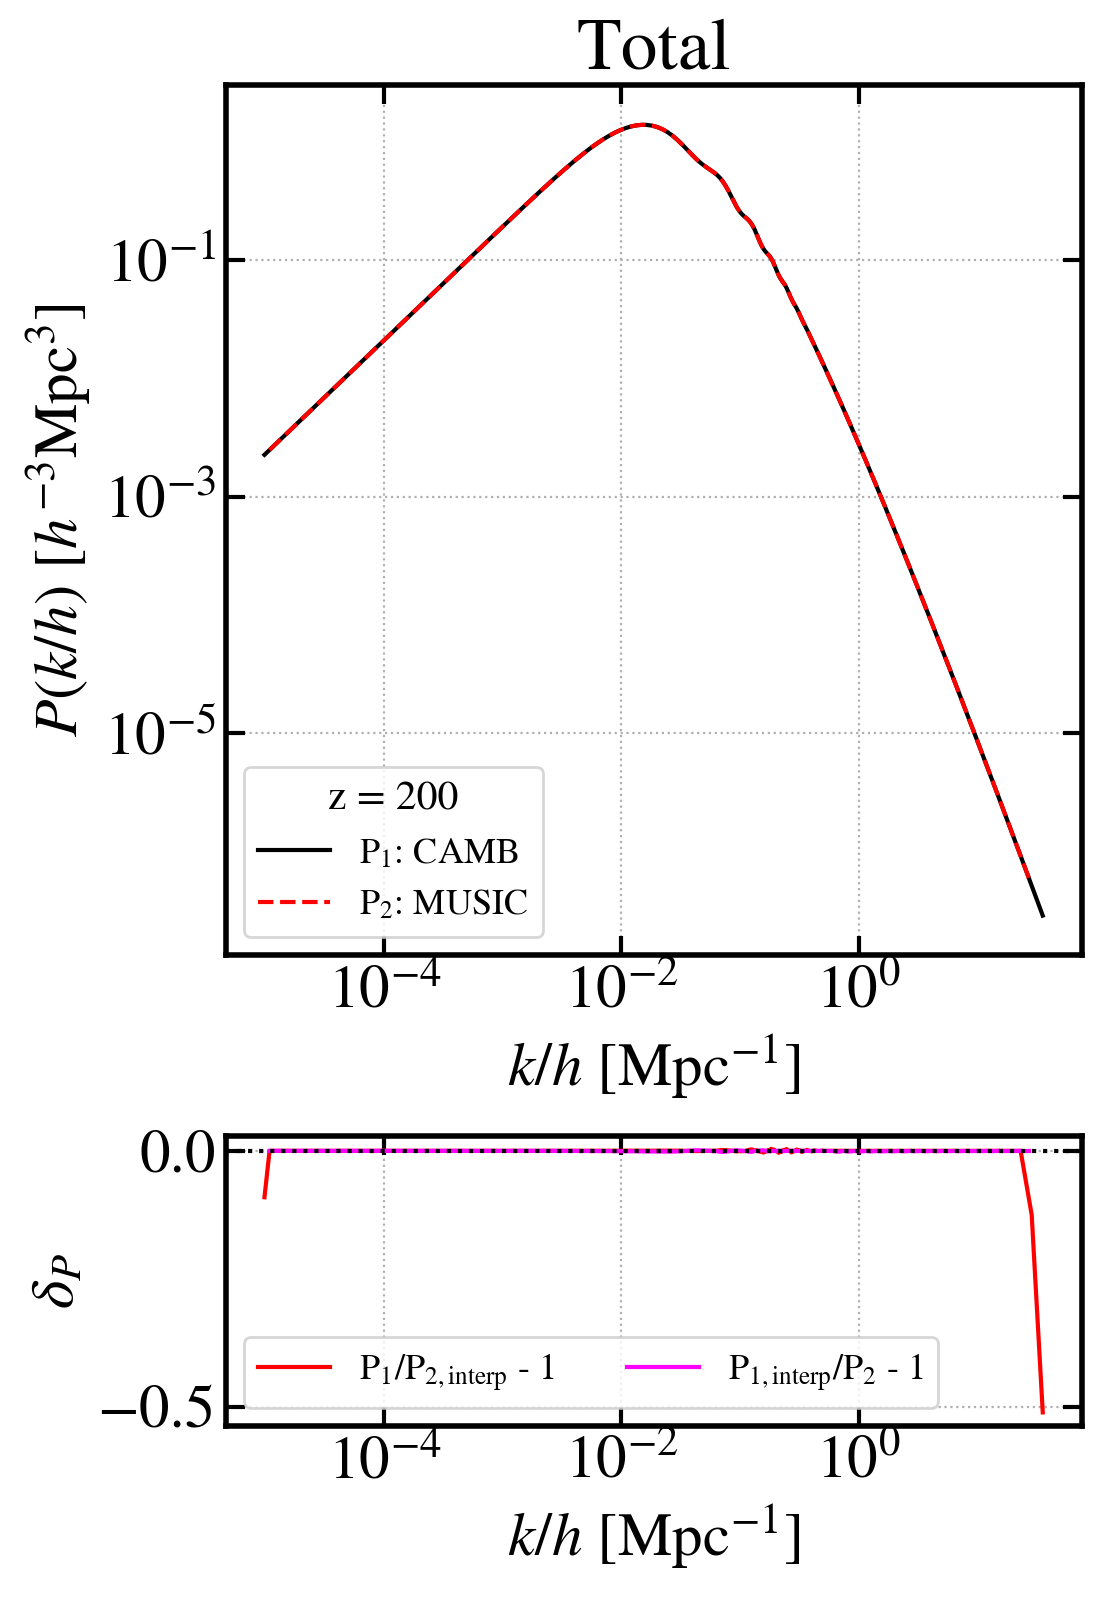

Pcamb / Pmusic =  1.0000000962082023


In [33]:
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_pnorm/box_lmin07_newpnorm/"
compare_camb_music(fpath)

**Good normalization!**  
**It shows only ~0.000009% difference!**

# [Trial-01] Using a larger `boxlength`

<IPython.core.display.Javascript object>


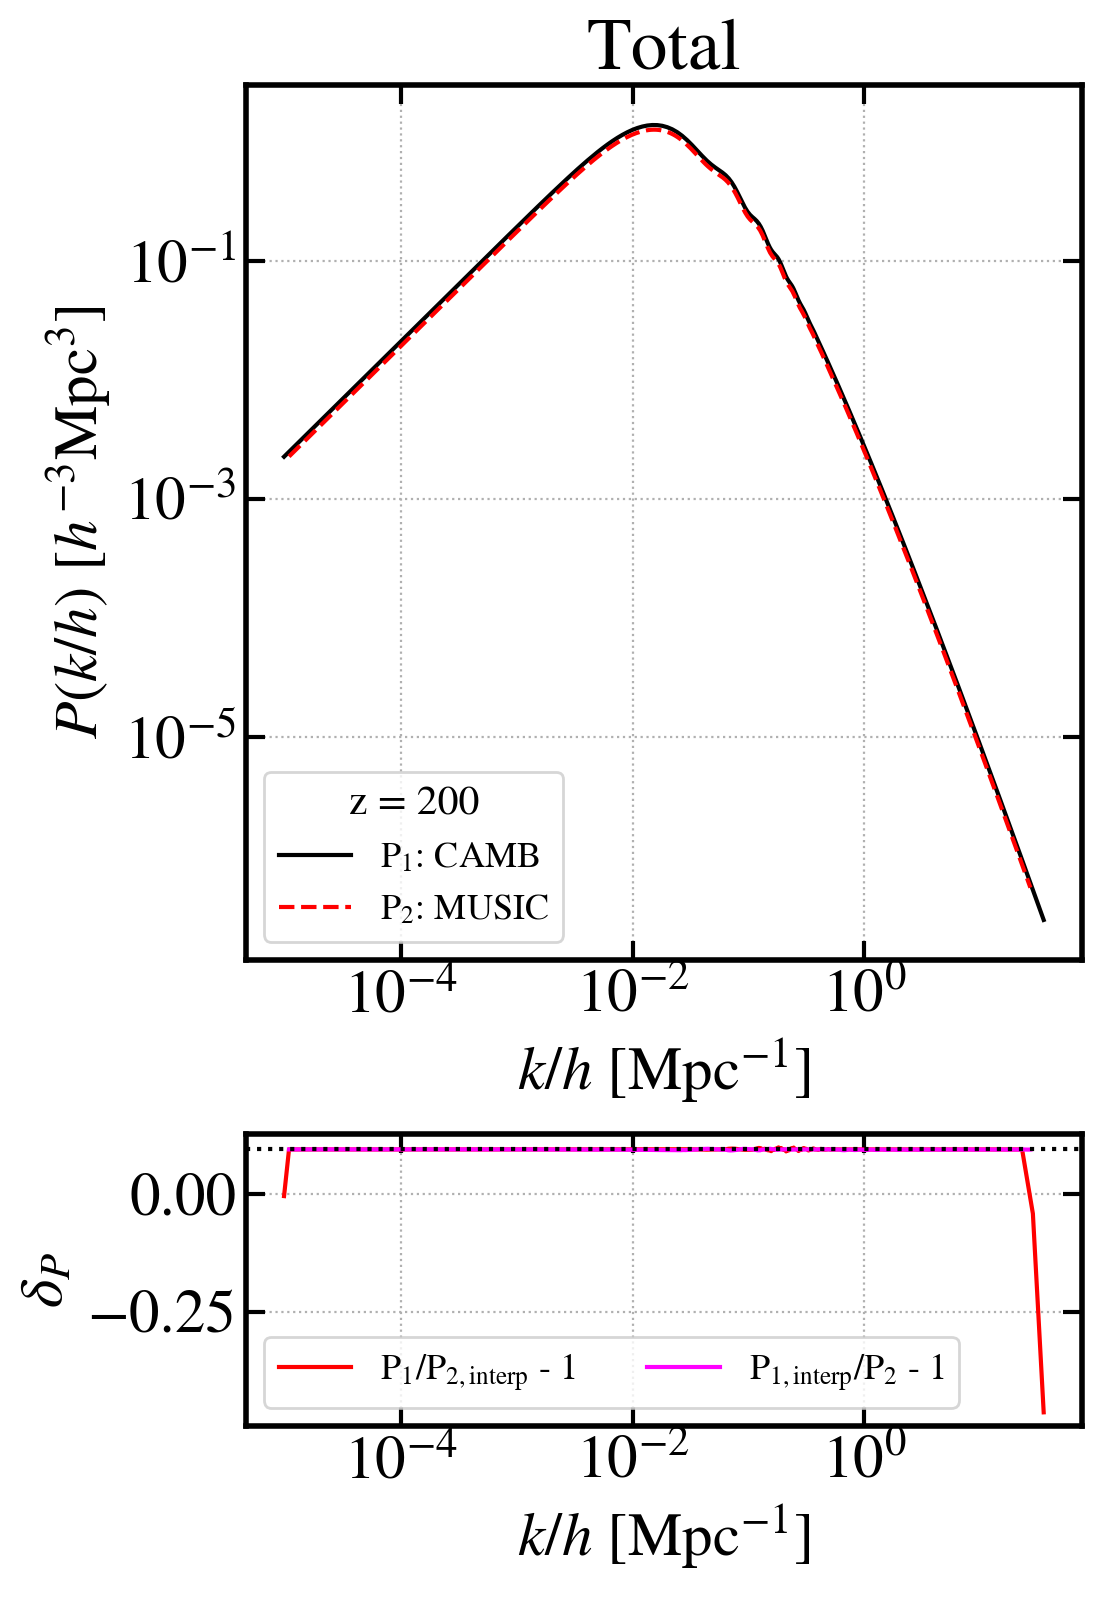

Pcamb / Pmusic =  1.0949093698522656


In [40]:
# fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_Lbox/box_lmin07/"
# fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_Lbox/box_lmin09/"
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_Lbox/box_lmin10/"
compare_camb_music(fpath)

In [41]:
P1P2_lmin07 = 1.0949093698522656
P1P2_lmin09 = 1.0949093698522656
P1P2_lmin10 = 1.0949093698522656

<IPython.core.display.Javascript object>


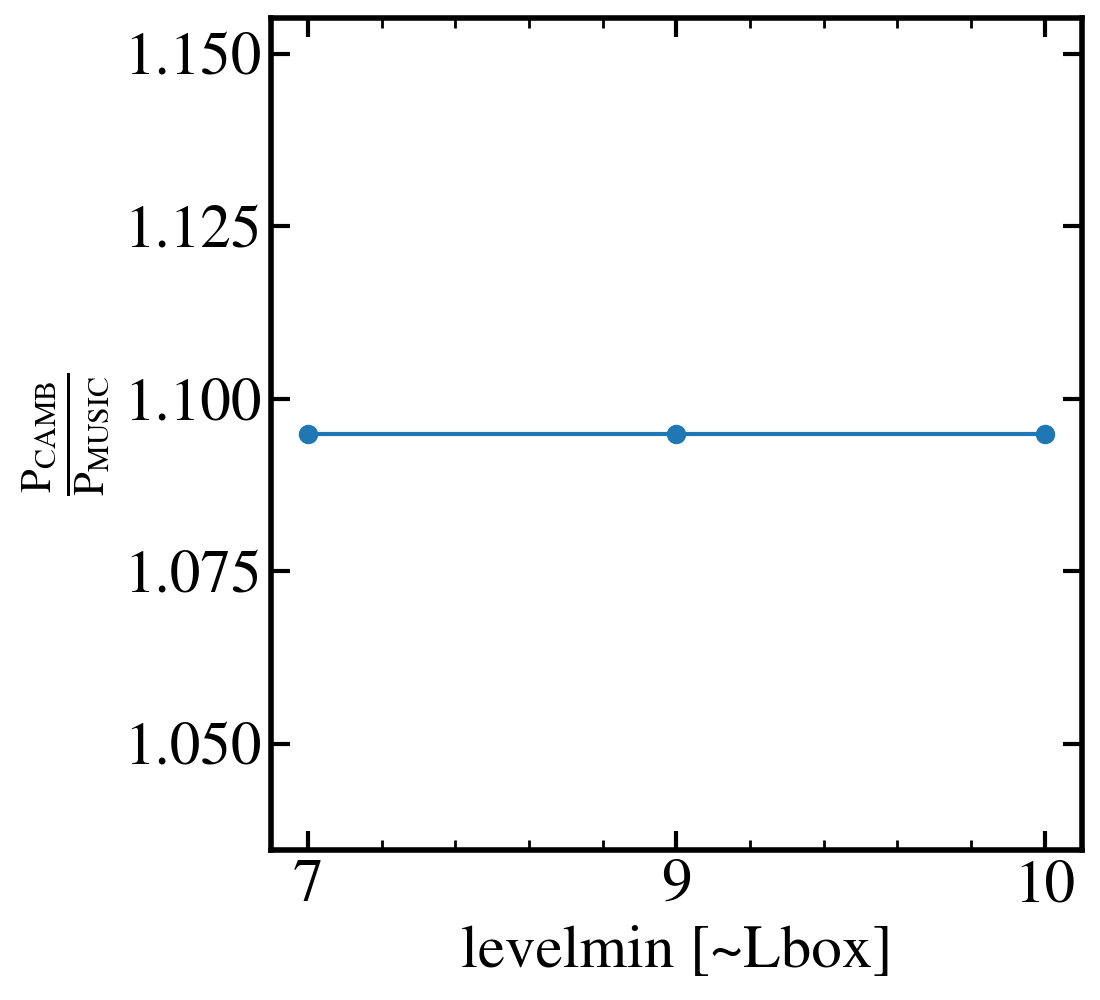

In [39]:
# just for checking
plt.figure(figsize=(5.5, 5))
y = [P1P2_lmin07, P1P2_lmin09, P1P2_lmin10]
x = np.arange(3)
plt.plot(x, y, "o-")
plt.xticks(ticks=x, labels=['7', '9', '10'])
plt.xlabel("levelmin [~Lbox]")
plt.ylabel(r"$\rm \frac{P_{CAMB}}{P_{MUSIC}}$")
plt.tight_layout(pad=0.3)

# [Trial-02] Changing `get_kmin` and `get_kmax` functions

Previously, we checked that the `get_kmax()` and `get_kmin()` functions, defined in `$MUSIC/src/plugins/transfer_camb.cc`, return **the second k-values from the beginning and the end of the k-values table.**

```c++
inline double get_kmin(void)
{
      return pow(10.0, m_tab_k[1]);  
}

inline double get_kmax(void)
{
      return pow(10.0, m_tab_k[m_tab_k.size() - 2]);
}
```

**In stead of using the second k-values, I can try taking the first k-values.**  
**I changed `get_kim()` and `get_kmax()` functions as follows and compile the MUSIC code again.**  

```c++
inline double get_kmin(void)
{
      return pow(10.0, m_tab_k[0]);  
}

inline double get_kmax(void)
{
      return pow(10.0, m_tab_k[m_tab_k.size() - 1]);
}
```

**The results are here: `/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_new/box_lmin07`.**

Just for test, I also tried to chaing the index to 20 (krange20).

<IPython.core.display.Javascript object>


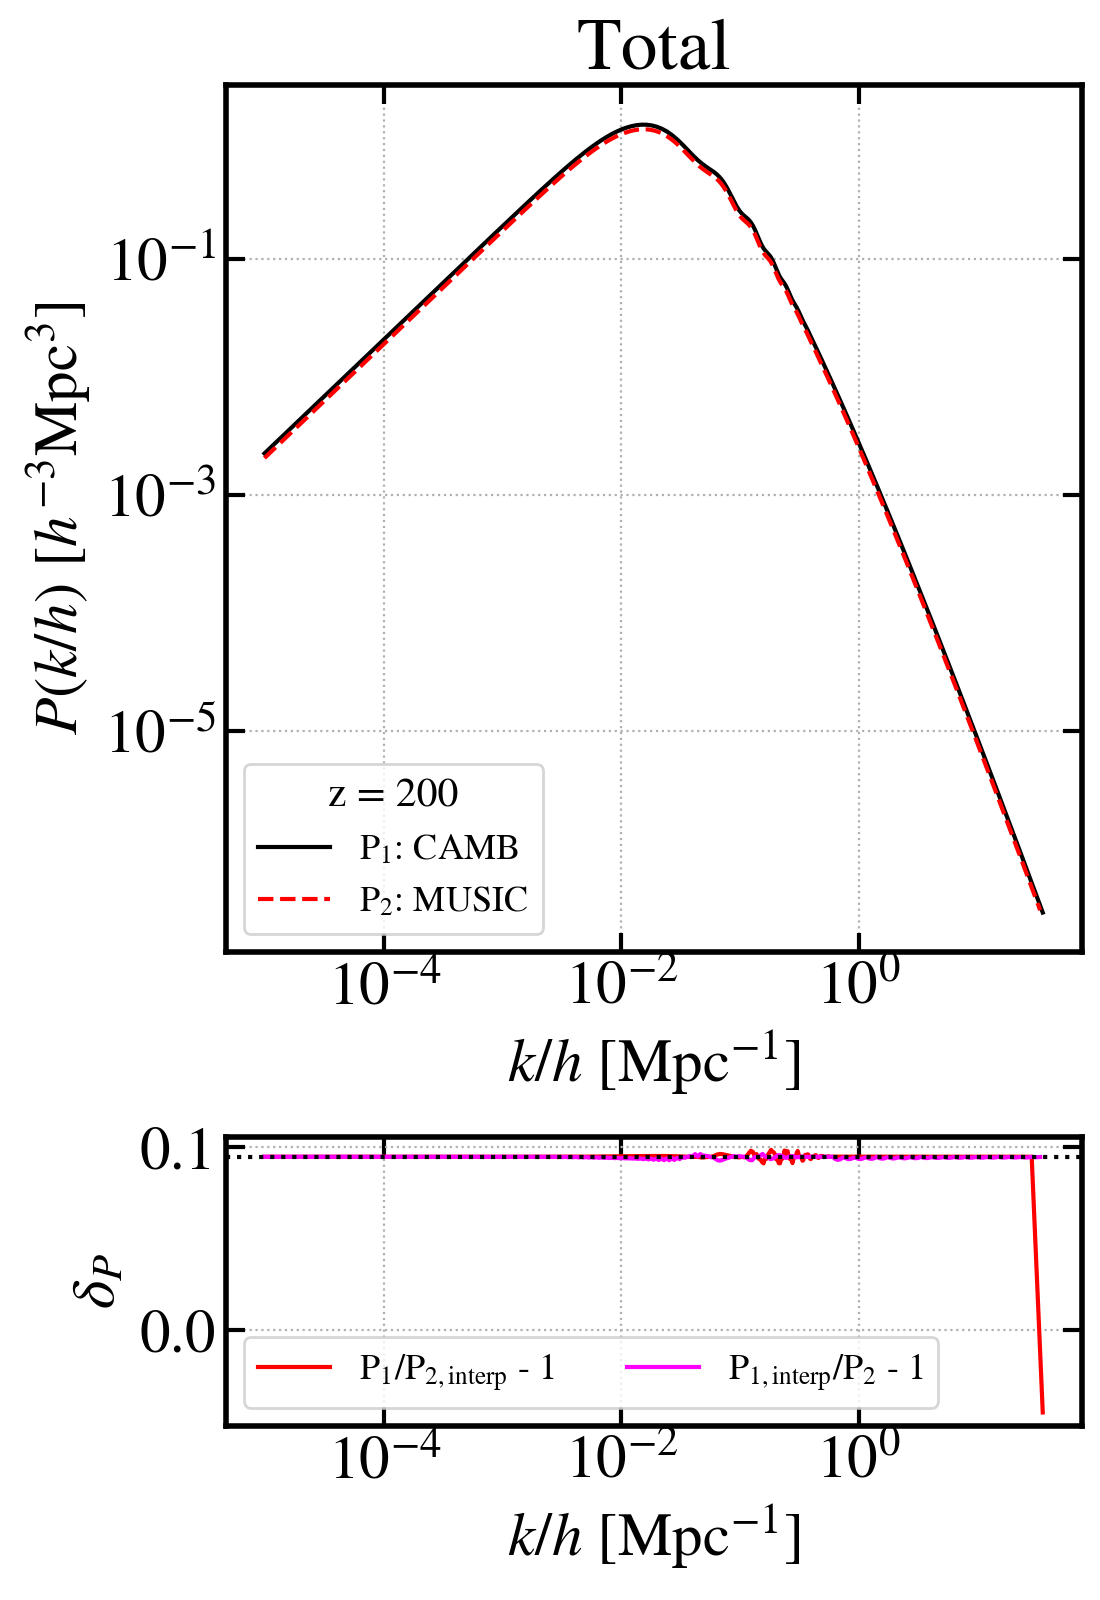

Pcamb / Pmusic =  1.0949090939984374


In [63]:
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_new/box_lmin07_krange01/"
# fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_new/box_lmin07_krange20/" # just for checking

compare_camb_music(fpath)

**It does not change the results..**

# [Trial-03] Finer k-tables (changing `k_per_log_int`)

<IPython.core.display.Javascript object>


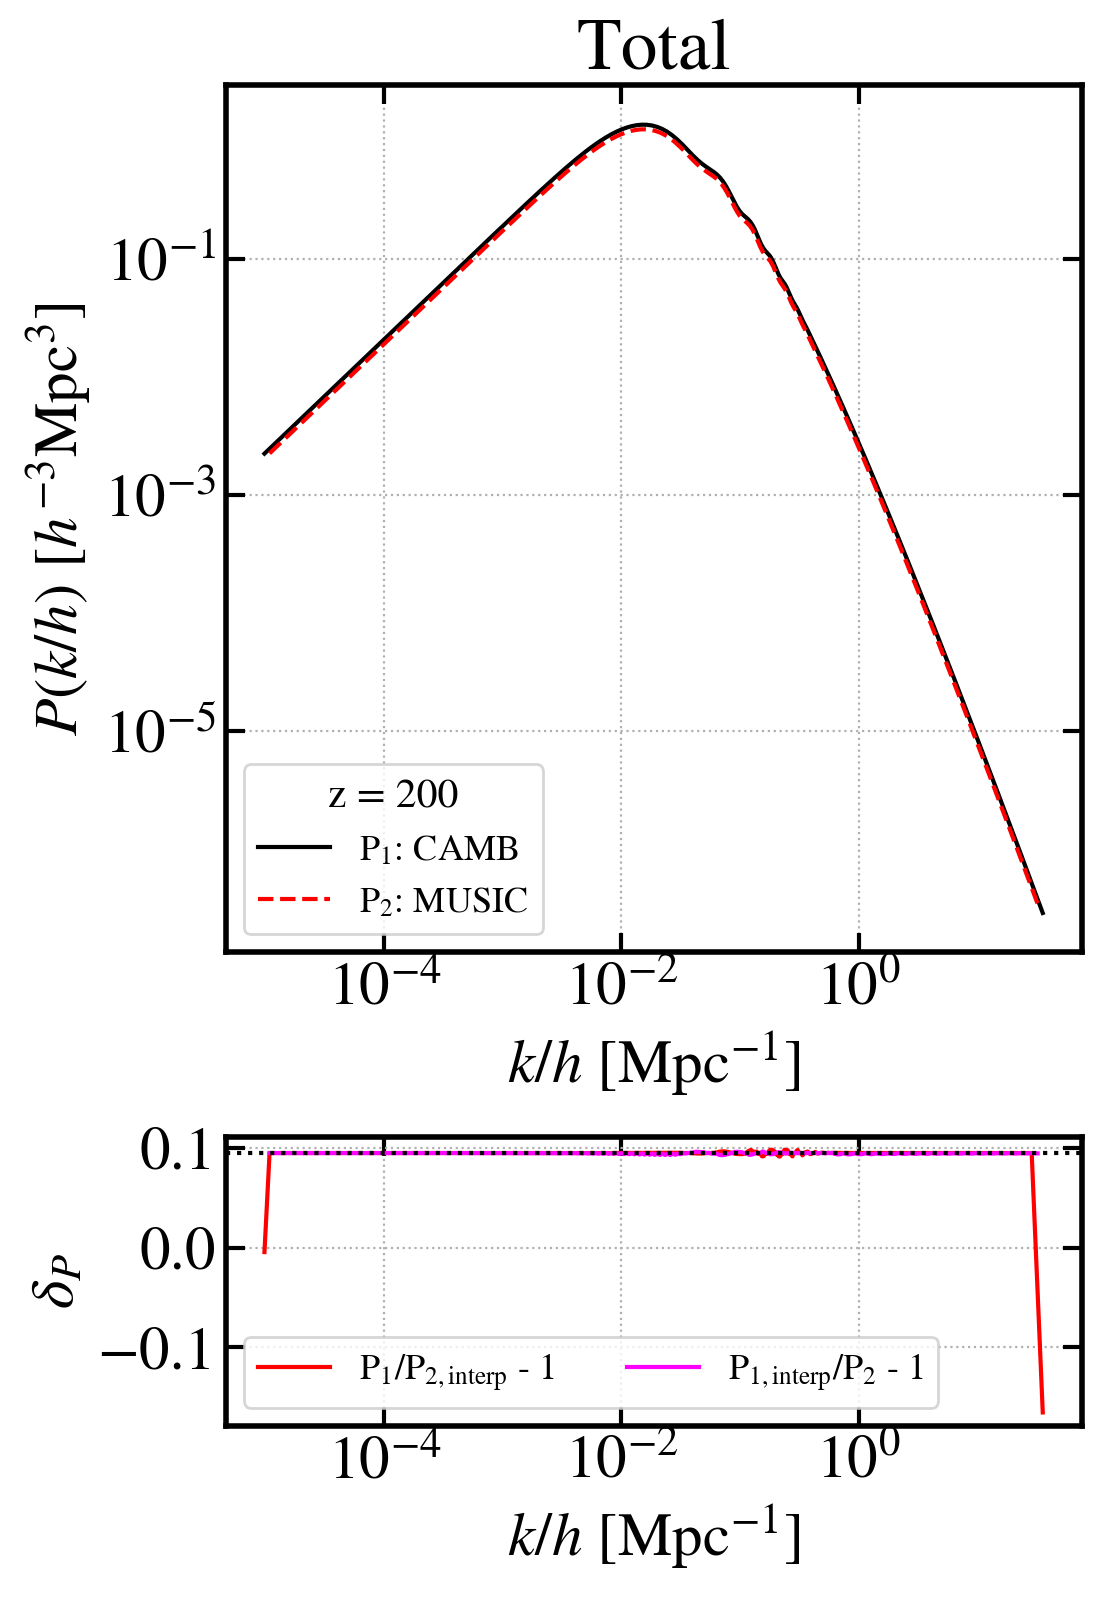

Pcamb / Pmusic =  1.094908168194862


In [47]:
# fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_knum/box_lmin07_camb_klogint000/"
# fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_knum/box_lmin07_camb_klogint100/"
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_knum/box_lmin07_camb_klogint500/"

# changing MUSIC source code (just for checking)
# fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_knum/box_lmin07_music_k3000/"

compare_camb_music(fpath)

In [48]:
P1P2_klogint000 = 1.0949093698522656
P1P2_klogint100 = 1.094908168194862
P1P2_klogint500 = 1.094908168194862

<IPython.core.display.Javascript object>


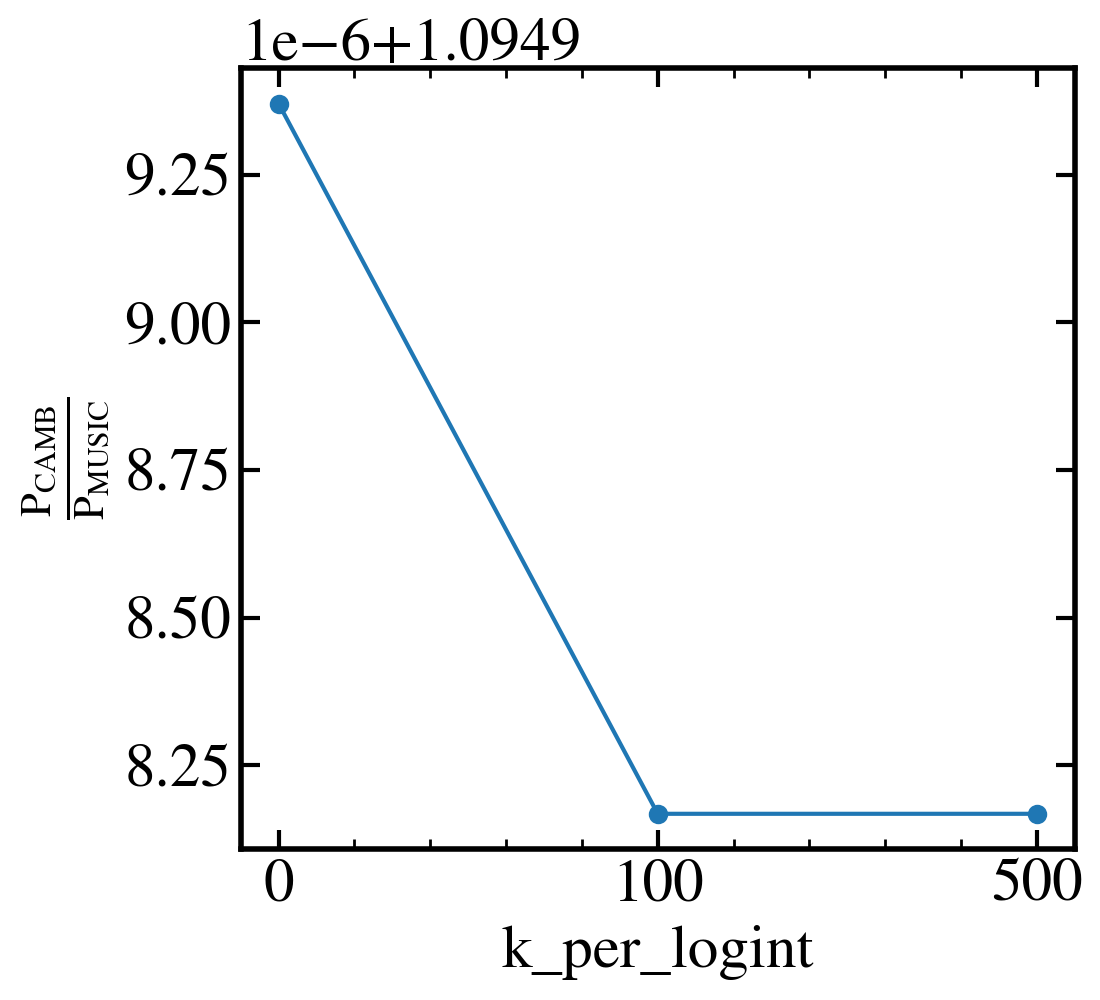

In [49]:
# just for checking
plt.figure(figsize=(5.5, 5))
y = [P1P2_klogint000, P1P2_klogint100, P1P2_klogint500]
x = np.arange(3)
plt.plot(x, y, "o-")
plt.xticks(ticks=x, labels=['0', '100', '500'])
plt.xlabel("k_per_logint")
plt.ylabel(r"$\rm \frac{P_{CAMB}}{P_{MUSIC}}$")
plt.tight_layout(pad=0.3)

# [Trial-04] larger `kmax`

<IPython.core.display.Javascript object>


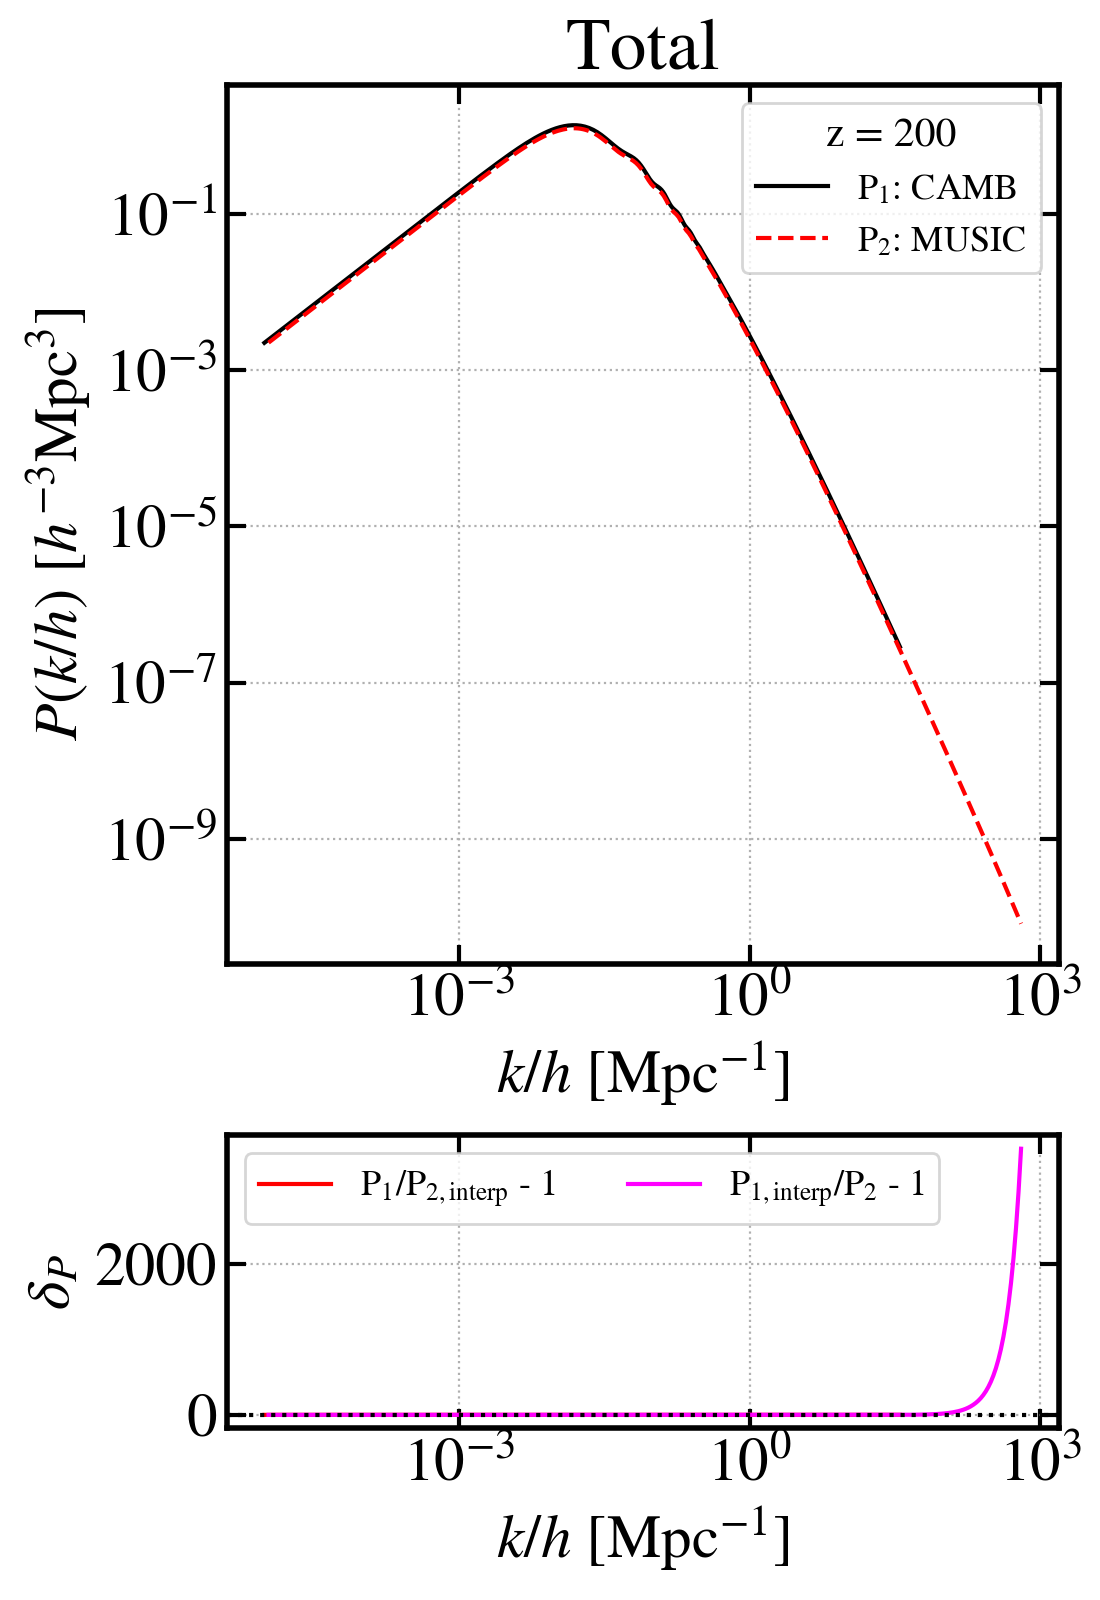

Pcamb / Pmusic =  1.0949093698522656


In [50]:
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_kmax/box_lmin07/"
compare_camb_music(fpath)

# After writing the Jupyter Notebook `03.about_normalization.ipynb`

# [Trial-04] Using a different integration method (trapezoidal)

<IPython.core.display.Javascript object>


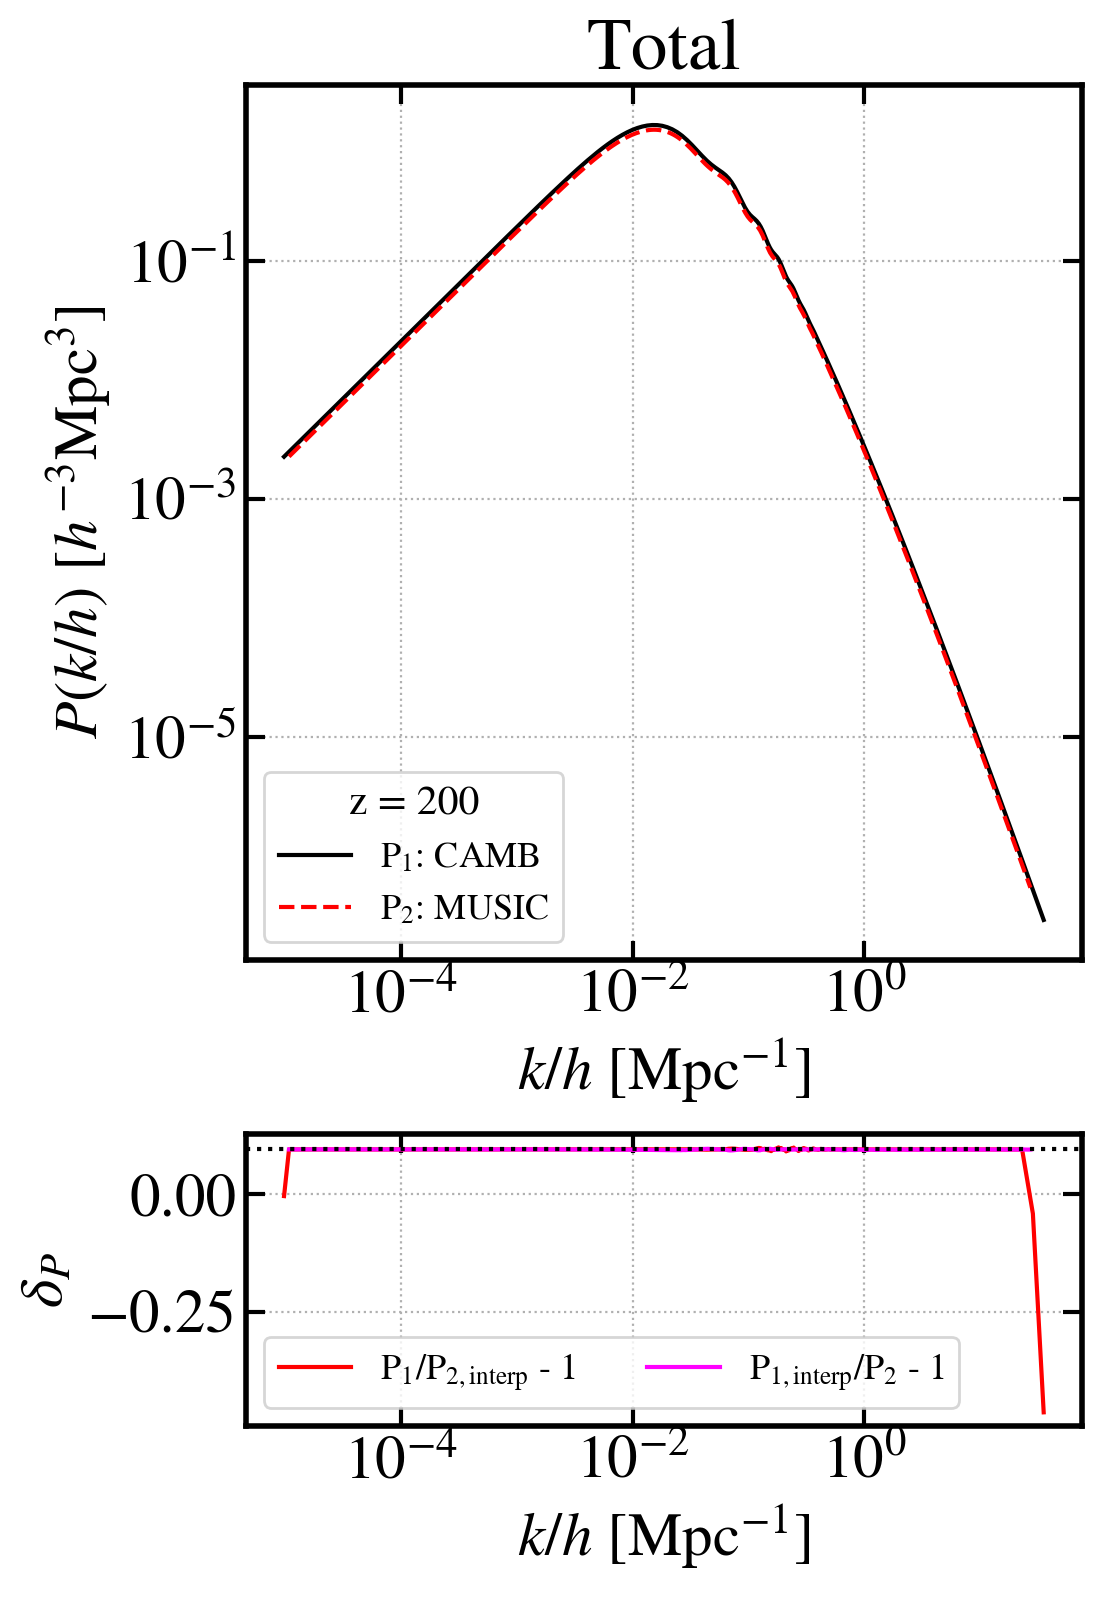

Pcamb / Pmusic =  1.0959943400769223


In [54]:
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_new/box_lmin07_trapez/"
compare_camb_music(fpath)

# [Trial-05] Changing `sigma_8` to one at $z=200$

<IPython.core.display.Javascript object>


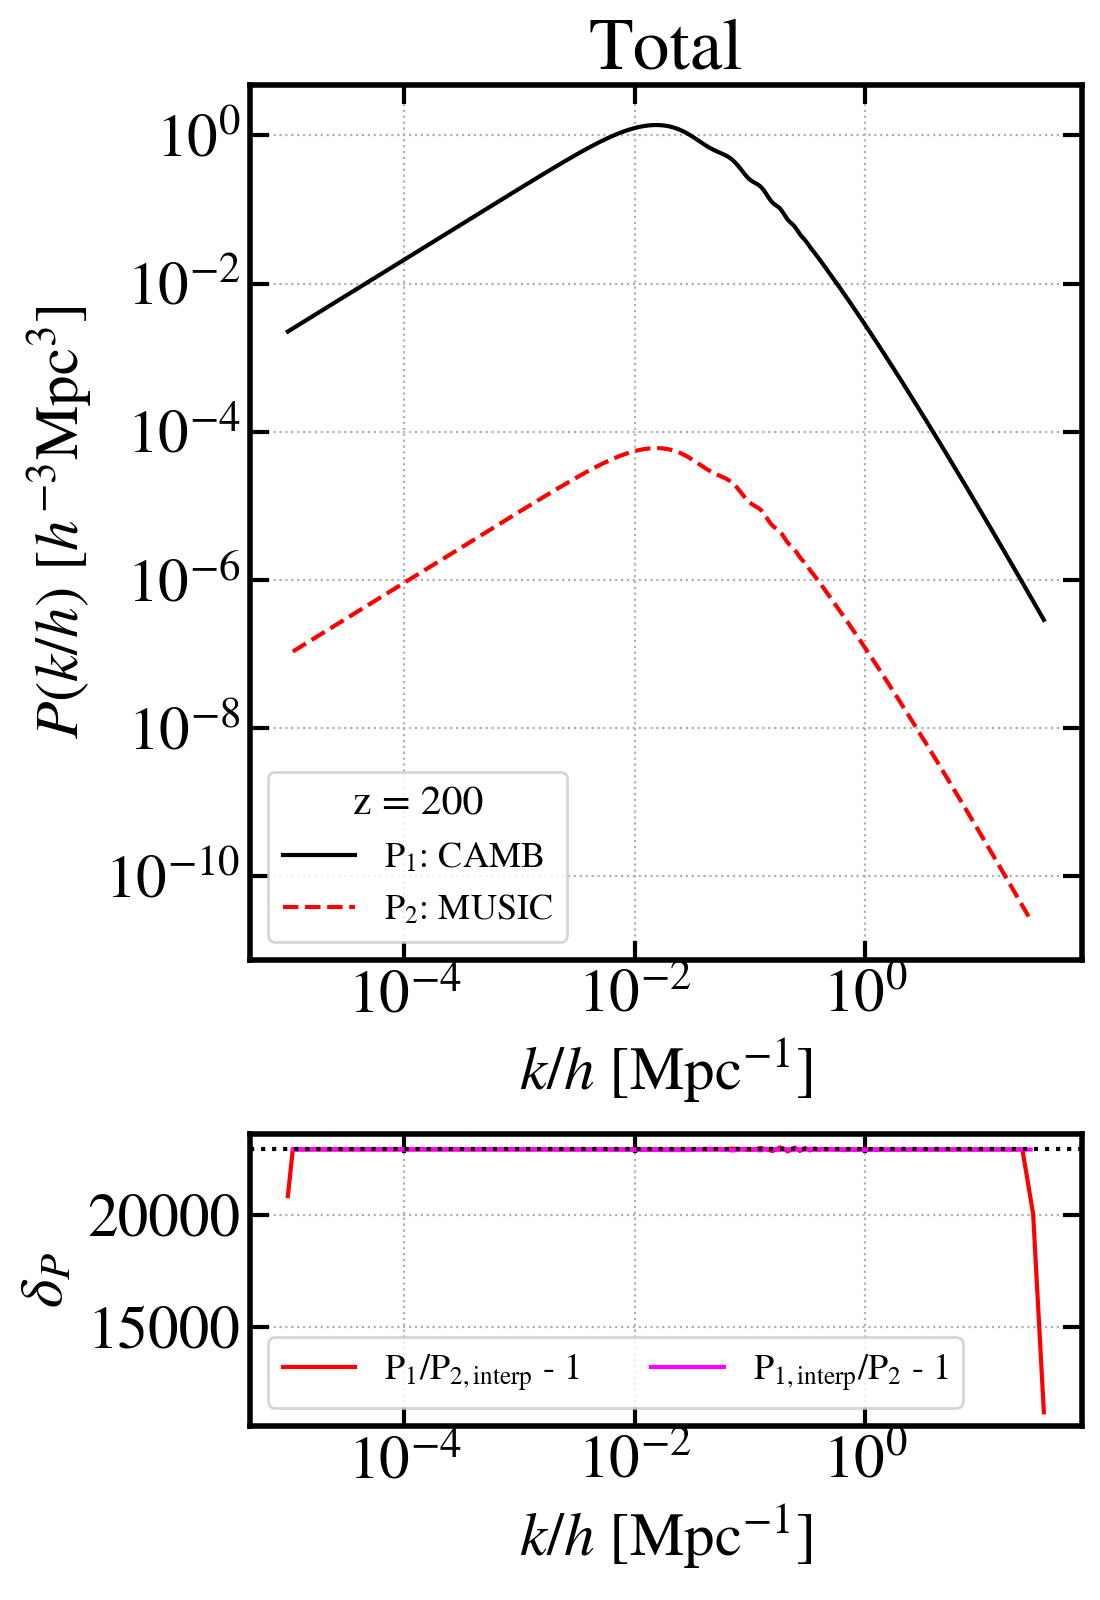

Pcamb / Pmusic =  22933.26964234839


In [55]:
# Changing `sigma_8` in the config file
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_old/test_sigma8/box_lmin07/"
compare_camb_music(fpath)

<IPython.core.display.Javascript object>


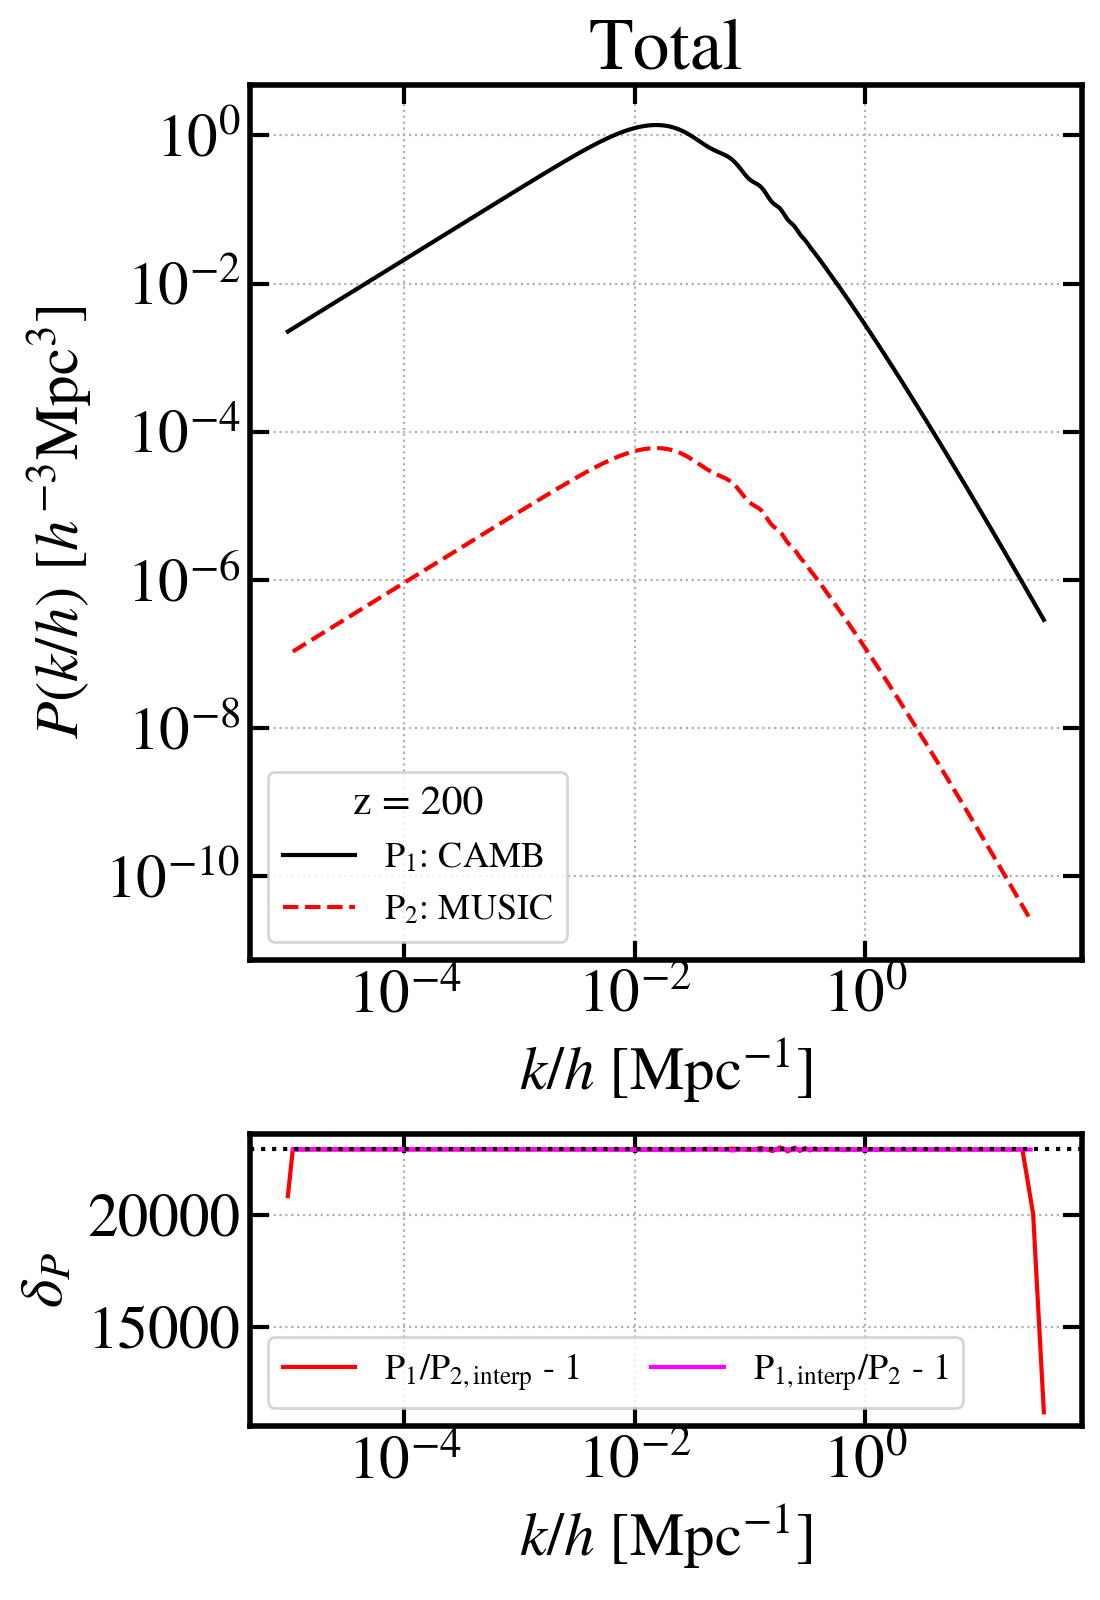

Pcamb / Pmusic =  22933.26964234839


In [56]:
# Changing `m_Cosmology.sigma8` in the source code
fpath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_new/box_lmin07_sigma8/"
compare_camb_music(fpath)